# Unique Fractions

Based on a Reddit post: [Unique Fractions between 0 and 1 visualized -- Angle = Value of fraction, Radius = Denominator.](https://www.reddit.com/r/math/comments/8j5vjx/oc_ver_2_unique_fractions_between_0_and_1/).

For some $N$, we generate all reduced fractions between $0$ and $1$ with denominator less than or equal to $N$. We do this by finding pairs $p, q$ with $0 < q <= N$ and $0 < p < q$ where $\text{GCD}(p, q) = 1$. 

Once we generate all the fractions, we plot them on a polar plot $(\theta, \rho)$ in the following way:

$$
\theta = \frac{2\pi p}{q} \\
\rho = q
$$

First we define some helper functions to generate the $p, q$ pairs, to turn those pairs into $\theta, \rho$ pairs, and to plot an array of $\theta, \rho$ pairs on a polar plot.

In [1]:
%matplotlib inline
import numpy as np
from math import pi
from math import gcd
from math import sqrt
from itertools import chain
import matplotlib.pyplot as plt

In [2]:
def generate_coprime_pairs(n):
    '''
    Generates an array with rows p n where p and n are coprime.
    
    All values in column 0 are integers between 1 and n.
    All values in column 1 are n.
    '''
    if n == 0:
        return np.array([(0, 1)])
    elif n == 1:
        return np.array([(1, 1)])
    return np.array([(i, n) for i in range(1, n) if gcd(i, n) == 1])

generate_coprime_pairs(5)

array([[1, 5],
       [2, 5],
       [3, 5],
       [4, 5]])

In [3]:
def generate_coprime_pairs_up_to(n):
    '''
    Generate an array of all coprime pairs p q for 0 < q <= n, 0 < p < q.
    '''
    return np.concatenate([generate_coprime_pairs(i) for i in range(n+1)], axis=0)

generate_coprime_pairs_up_to(5)

array([[0, 1],
       [1, 1],
       [1, 2],
       [1, 3],
       [2, 3],
       [1, 4],
       [3, 4],
       [1, 5],
       [2, 5],
       [3, 5],
       [4, 5]])

In [4]:
def generate_polar_coords(array):
    '''
    Take an array of p, q coprime pairs. Return an array of θ, ρ pairs.
    
    θ = 2πp/q
    ρ = q
    '''
    return np.array([(2*pi*p/q, q) for p, q in array])

def generate_polar_coords_up_to(n):
    '''
    Generate an array of all coprime pairs p q for 0 < q <= n, 0 < p < q.
    Return an array where all p, q pairs are turned into θ, ρ pairs.
    
    θ = 2πp/q
    ρ = q
    '''
    return generate_polar_coords(generate_coprime_pairs_up_to(n))
    
generate_polar_coords_up_to(5)

array([[0.        , 1.        ],
       [6.28318531, 1.        ],
       [3.14159265, 2.        ],
       [2.0943951 , 3.        ],
       [4.1887902 , 3.        ],
       [1.57079633, 4.        ],
       [4.71238898, 4.        ],
       [1.25663706, 5.        ],
       [2.51327412, 5.        ],
       [3.76991118, 5.        ],
       [5.02654825, 5.        ]])

In [5]:
def polar_plot(points, *argv, **kwargs):
    '''
    For an array of θ, ρ pairs, plot them in a polar plot.
    
    Additional args and kwargs will be passed to matplotlib's
    pyplot.polar function. Use this to control display of the plot.
    
    The size of the figure is the square root of the largest ρ value.
    I picked the square root scaling because I wanted the figure 
    to grow as ρ grows, but not too quickly. Other scaling functions could
    be better; maybe log.
    '''
    _, largest_radius = np.amax(points, axis=0)
    figsize = sqrt(largest_radius)
    plt.figure(figsize=(figsize, figsize))
    line2d = plt.polar(points[:, 0], points[:, 1], *argv, **kwargs)
    line2d[0].axes.set_rorigin(0)
    return line2d

We have defined all the helper functions we need to. Now let's plot the points. First for a small $N$ so we can see the points around the origin, and then for some large $N$ so we can see larger patterns emerge.

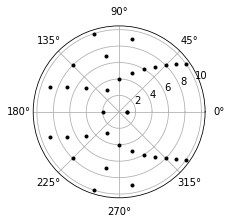

In [6]:
polar = polar_plot(generate_polar_coords_up_to(10), 'k.')

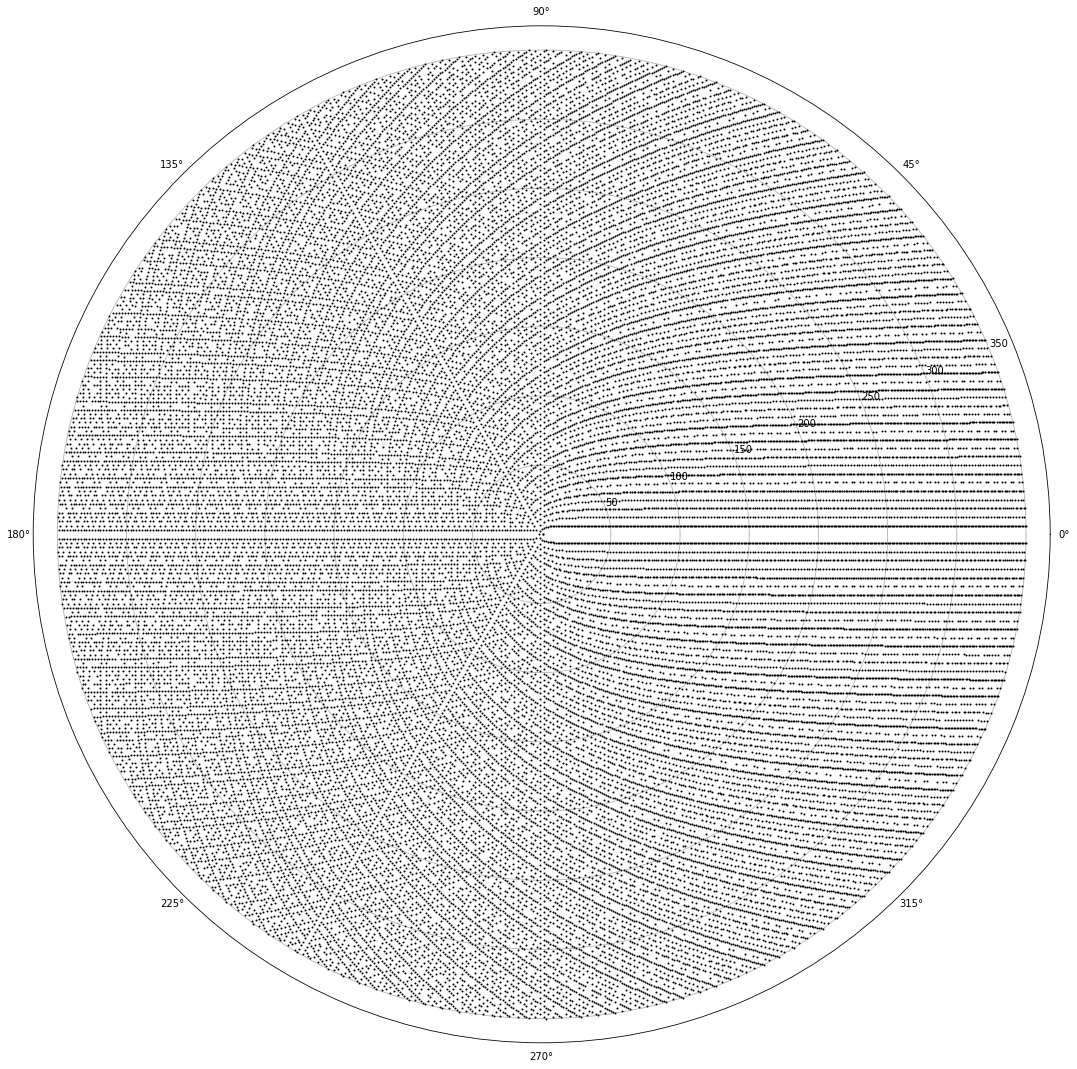

In [8]:
bigN = 350
bigNPoints = generate_polar_coords_up_to(bigN)
bigNPlot = polar_plot(bigNPoints, 'k.', markersize=2)

We can see lots of interesting stuff in this plot. The curves arcing around, the lines radiating out. Let's dig into some of these.

The first thing that jumps out at me are the radial "lines" which are absent of points. Those come about because, with the way we are plotting, there can only ever be one point at a particular angle $\theta$. Once you put a point at, say, $\theta=0$ (or some other multiple of $2\pi$, no other points will ever be at that angle for any radius $\rho$ other than the $\rho$ of that initial point. Each point at a given angle casts a "shadow" along its radius. 

We can see that the size of the shadows is inversely proportional to $\rho$. That is, point $(2\pi\frac{1}{1}, 1)$ casts the biggest shadow, $(2\pi\frac{1}{2}, 2)$ the next biggest, then $(2\pi\frac{1}{3}, 3)$ and $(2\pi\frac{2}{3}, 3)$, and so on. I am not sure why that is.

Let's plot lines through the first few points to pick out their shadows.

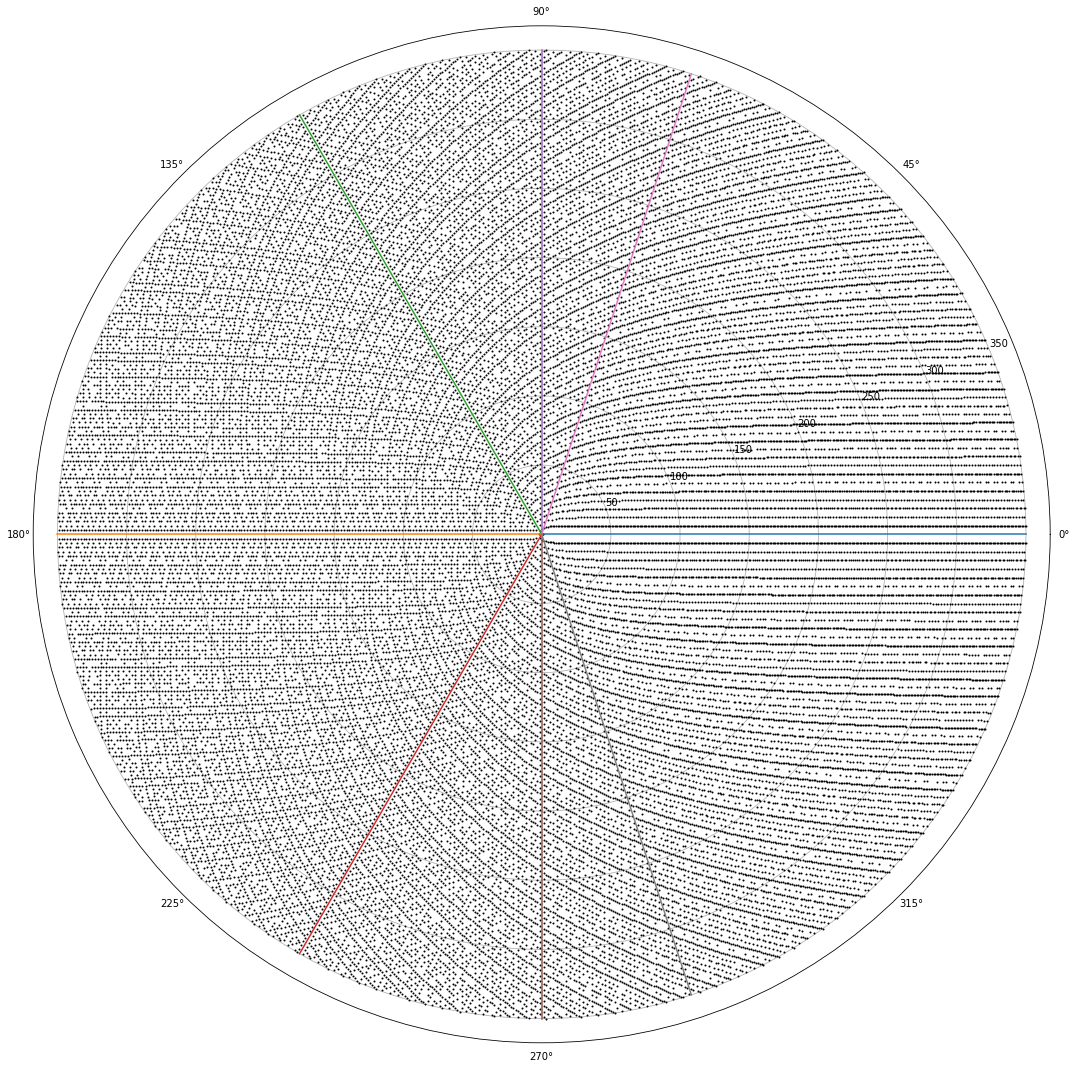

In [9]:
lowNAngles = [0, pi, 2*pi/3, 2*pi*2/3, 2*pi/4, 2*pi*3/4, 2*pi/5, 2*pi*4/5]
bigNPlot = polar_plot(bigNPoints, 'k.', markersize=2)
axes = bigNPlot[0].axes
for angle in lowNAngles:
    axes.plot((0, angle), (0, bigN))
plt.show()

The next feature I want to pick out is the arc surrounding around the positive $x$ axis, or $\theta = 2\pi i$ for integer $i$. That arc is made of all points $(\pm 2\pi \frac{1}{q}, q)$. Or, keeping $\theta$ positive, all points $(2\pi \frac{1}{q}, q)$ and $(2\pi (1-\frac{1}{q}), q)$. How do we know that?

Well, at the very least we know all those points are in our set. Remember that to be in our set of points the numerator $p$ of the angle $\theta = 2\pi \frac{p}{q}$ has to be relatively prime to $q$, which we test by checking that $\text{gcd}(p,q)=1$. Well, the GCD of $1$ with anything is $1$. So we know that for every denominator $q$, we will always have a pair $(1, q)$ in out set of points. We can also argue that $(q-1, q)$ would be in our set of points: $\text{gcd}(q-1, q) = \text{gcd}(-1, q)$ (using the property $\text{gcd}(a, b) = \text{gcd}(a \mod b, b)$) and the GCD of $-1$ with anything is also $1$. 

So we know those points are in our set. But are we sure they're the ones around the $x$ axis? Let's color those points in to highlight them.

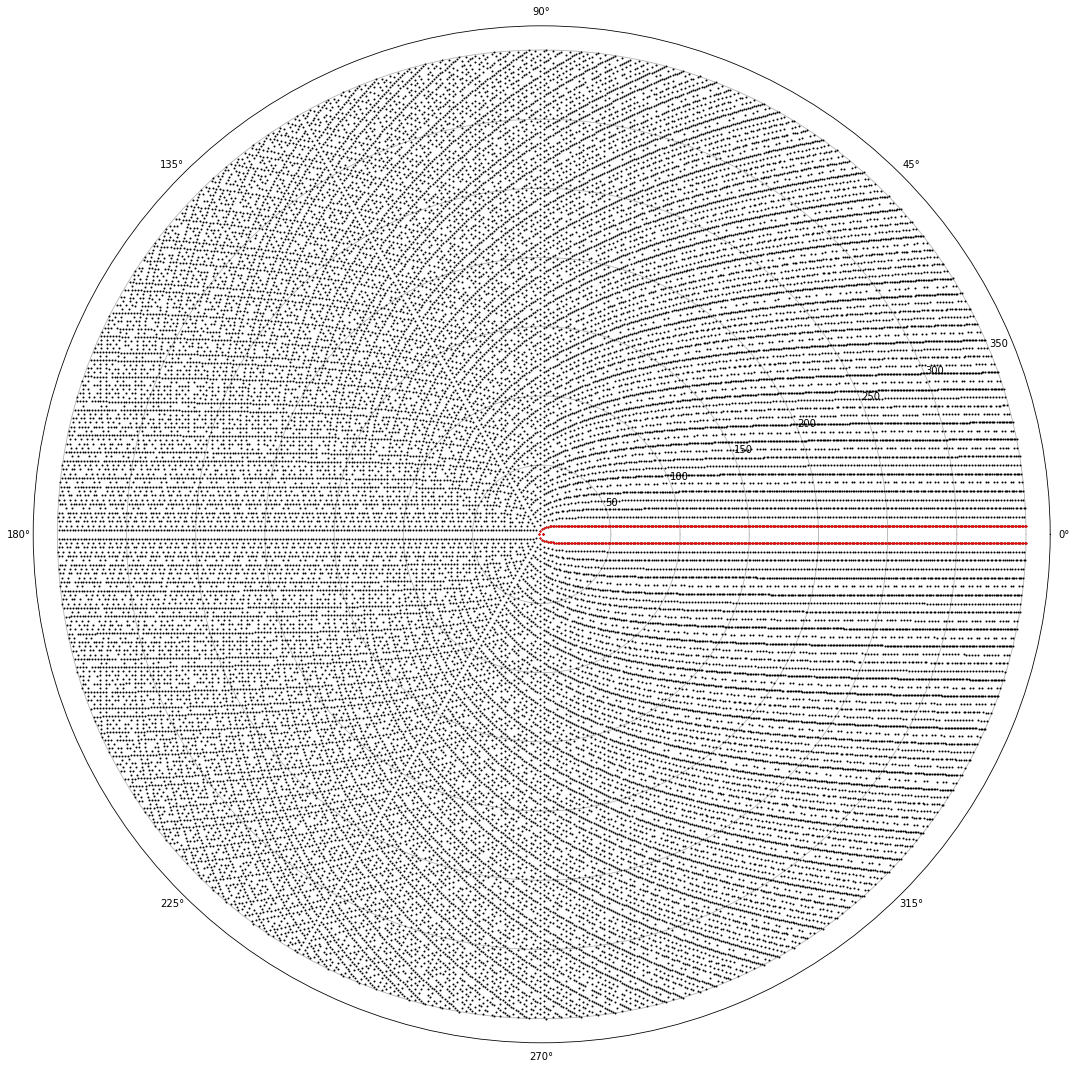

In [10]:
bigNPlot = polar_plot(bigNPoints, 'k.', markersize=2)
axes = bigNPlot[0].axes

oneOverNPairs = np.concatenate((
    np.array([(1, i) for i in range(1, bigN+1)]),
    np.array([(i-1, i) for i in range(1, bigN+1)])
), axis=0)
oneOverNPoints = generate_polar_coords(oneOverNPairs)
axes.plot(oneOverNPoints[:, 0], oneOverNPoints[:, 1], 'r.', markersize=2)
plt.show()

We do see that points of the form $(2\pi\frac{1}{q}, q)$ and $(2\pi\frac{q-1}{q}, q)$ are in the first curve of points surrounding the $x$ axis.

But we don't have to limit ourselves to just that first curve. Each one of the curves opening to the right is a set of points based on the fraction with numerator either $p$ or $q-p$. The curve we just examined is the curve with $p=1$, but there are curves for all values of $p$.

As we look down from one curve to the next, we can see that some are dense, with lots of points, and others are much less so. The densest curves are those with prime $p$, because those are relatively prime to every $q$ and thus will show up at all radii. The least dense curves are those for numerators $p$ with lots of factors; since there are lots of $q$ that share those factors, there are lots of radii at with the curves for these $p$ will not appear.

I want to color in the curves for numerators $p$ that are prime. First, a couple more helper functions.

In [11]:
def primesfrom2to(n):
    # http://stackoverflow.com/questions/2068372/fastest-way-to-list-all-primes-below-n-in-python/3035188#3035188
    """ Input n>=6, Returns a array of primes, 2 <= p < n """
    sieve = np.ones(n//3 + (n%6==2), dtype=np.bool)
    sieve[0] = False
    for i in range(int(n**0.5)//3+1):
        if sieve[i]:
            k=3*i+1|1
            sieve[      ((k*k)//3)      ::2*k] = False
            sieve[(k*k+4*k-2*k*(i&1))//3::2*k] = False
    return np.r_[2,3,((3*np.nonzero(sieve)[0]+1)|1)]

def posi_pairs_with_prime_numerator(prime, n):
    if (prime >= n):
        return [()]
    return [(prime, i) for i in range(prime, n+1) if gcd(prime, i) == 1]

def neg_pairs_with_prime_numerator(prime, n):
    if (prime >= n):
        return [()]
    return [(i-prime, i) for i in range(prime, n+1) if gcd(prime, i) == 1]

pos_pairs = []
neg_pairs = []
for prime in primesfrom2to(bigN).tolist():
    pos_pairs.extend(posi_pairs_with_prime_numerator(prime, bigN))
    neg_pairs.extend(neg_pairs_with_prime_numerator(prime, bigN))

both = [pair for pair in pos_pairs if pair in neg_pairs]

We will use these helper functions to generate points on the prime curves. For those pairs of points the form $(p, q)$ where $p$ is prime, I will color them red. For those points of the form $q-p, q$ with $p$ prime, I will color them blue. For points that are on both lists (which will happen when $p$ is prime and $q-p$ is also prime) I will color them purple (in between red and blue) but with a $+$ marker instead of the usual $.$.

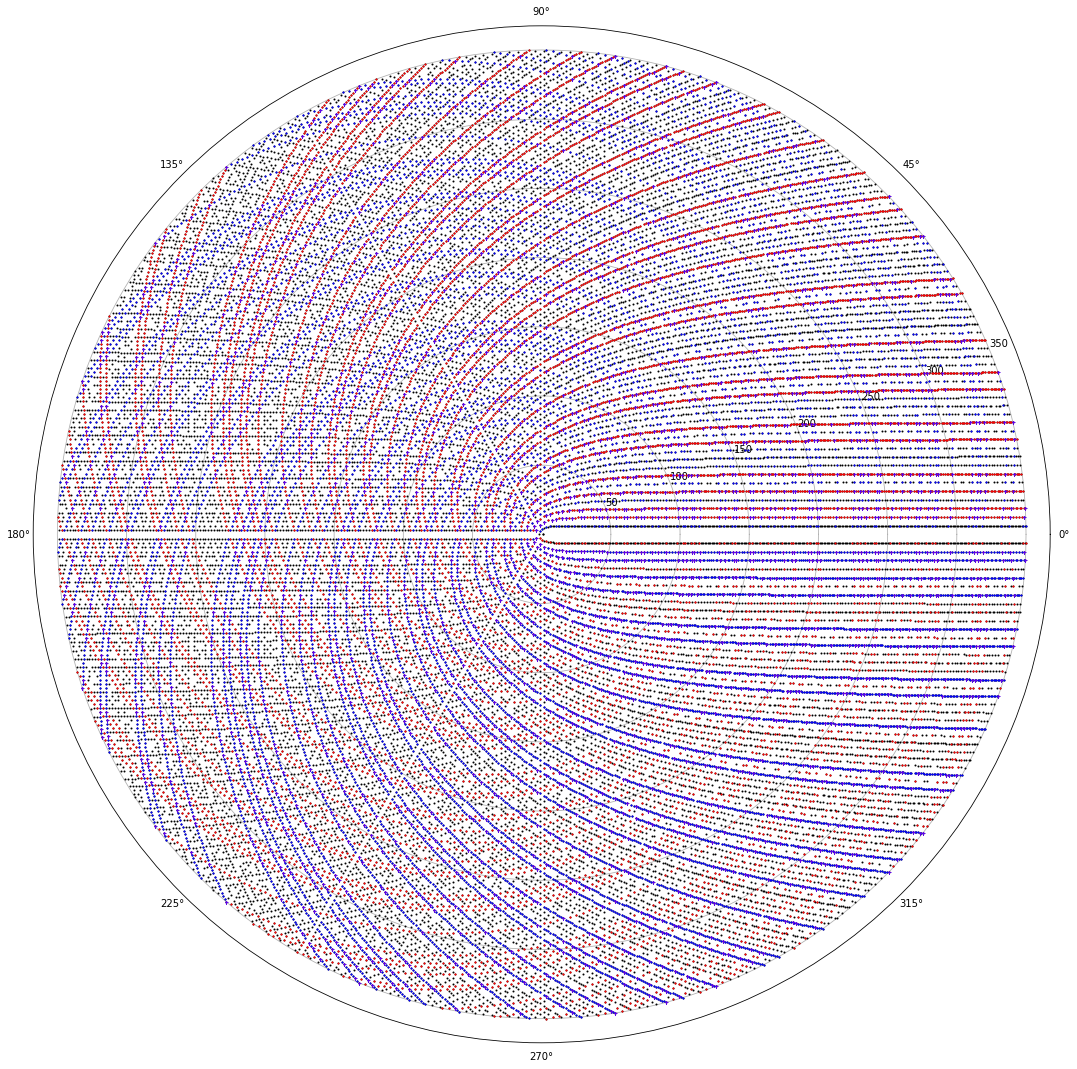

In [12]:
bigNPlot = polar_plot(bigNPoints, 'k.', markersize=2)
axes = bigNPlot[0].axes
    
pos_points = generate_polar_coords(np.array(pos_pairs))
neg_points = generate_polar_coords(np.array(neg_pairs))
both_points = generate_polar_coords(np.array(both))
    
axes.plot(pos_points[:, 0], pos_points[:, 1], 'r.', markersize=2)
axes.plot(neg_points[:, 0], neg_points[:, 1], 'b.', markersize=2)
axes.plot(both_points[:, 0], both_points[:, 1], '+', color='#5d06e9', markersize=3)
plt.show()

I didn't expect to see curves like that! I expected that we would get just the solid curves opening to the right, like we did for the $p=1$ case. But instead what we see is these curves that lie flat against the $x$ axis for part of their length and gracefully spiral around the origin for another part.